In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append(r'/Users/zhouzhan/Documents/codes/python_code/liver_disease/liver_disease/')
# sys.path.append(r'E:/liver_disease/liver_disease')
import constants
from sklearn.model_selection import train_test_split

In [2]:
'''
汇总表-未做特征选择:    MERGE_CSV_PATH
汇总表-特征选择后:     SELECTION_MERGE_CSV_PATH
人工选择特征:         SYMP_MAIN_ACC_DIAGNOSIS_PATH
SMOTE:              SMOTE_MERGE_CSV_PATH
SMOTE Borderline1:  SMOTE_BORDERLINE1_MERGE_CSV_PATH
SMOTE_D:            SMOTE_D_MERGE_CSV_PATH
SMOTE_BORDERLINE_D: SMOTE_Borderline_D_CSV_PATH
随机过采样:           RANDOM_OVER_SAMPLER_CSV_PATH
'''
PATH = constants.RANDOM_OVER_SAMPLER_CSV_PATH

In [3]:
df = pd.read_csv(PATH)

cols = df.columns.values.tolist()
# cols.remove('INHOSPTIAL_ID')
cols.remove('ZHENGHOU1')

X = df[cols] 
y = df['ZHENGHOU1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print(df.head())

   腹胀  发热  尿黄  纳差  双下肢水肿  乏力  黑便  头晕  腹痛  身目黄染  ...  嗜睡  咽部隐痛不适  干呕  排便不爽  \
0   1   0   1   0      0   0   0   0   0     1  ...   0       0   0     0   
1   0   1   1   0      0   0   0   0   0     1  ...   0       0   0     0   
2   0   0   0   0      0   0   0   0   0     0  ...   0       0   0     0   
3   1   0   1   0      0   0   0   0   0     1  ...   0       0   0     0   
4   0   1   0   0      0   0   0   0   0     0  ...   0       0   0     0   

   口淡无味  大便稀少  大便未解  肝区疼痛  大便稀溏  ZHENGHOU1  
0     0     0     0     0     0          1  
1     0     0     0     0     0          1  
2     0     0     0     0     0          1  
3     0     0     0     0     0          1  
4     0     0     0     0     0          1  

[5 rows x 58 columns]


# 决策树-随机过采样

In [4]:
from sklearn.tree import DecisionTreeClassifier

# 使用最优参数：{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 4}
clf = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=4)
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=12, min_samples_split=4)

In [6]:
test_result = clf.predict(X_test)
# 模型评估
import sklearn.metrics as metrics
print('决策树准确度：')
print(metrics.classification_report(y_test,test_result))

决策树准确度：
              precision    recall  f1-score   support

           1       0.65      0.65      0.65        40
           2       0.70      0.70      0.70        46

    accuracy                           0.67        86
   macro avg       0.67      0.67      0.67        86
weighted avg       0.67      0.67      0.67        86



In [23]:
# 变量贡献度
features = list(X_test.columns)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

print(importances)
print(indices)
print(num_features)

top_indices = indices[0:20]
print(top_indices)
top_features = len(top_indices)

[0.03674245 0.02656094 0.06163897 0.11646141 0.08487297 0.07168017
 0.0681469  0.00845921 0.03081812 0.07979709 0.06129289 0.008946
 0.06799628 0.         0.         0.         0.01358627 0.
 0.03982823 0.00534626 0.         0.06387493 0.         0.
 0.01744245 0.         0.01638639 0.         0.         0.
 0.         0.01747881 0.         0.         0.0208193  0.
 0.         0.         0.         0.01868425 0.00285963 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02988106 0.         0.
 0.         0.01139011 0.01900893]
[ 3  4  9  5  6 12 21  2 10 18  0  8 51  1 34 56 39 31 24 26 16 55 11  7
 19 40 14 13 44 46 45 47 48 49 50 52 53 54 15 20 17 32 38 37 36 35 41 33
 30 43 29 27 25 23 22 42 28]
57
[ 3  4  9  5  6 12 21  2 10 18  0  8 51  1 34 56 39 31 24 26]


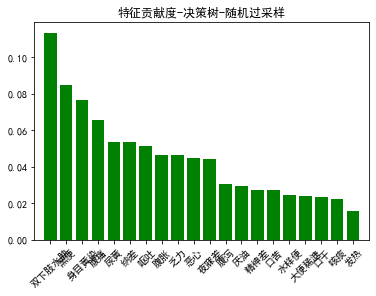

In [35]:
#将特征重要度以柱状图展示

import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置字体
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure()
plt.title("特征贡献度-决策树-随机过采样")
plt.bar(range(top_features), importances[top_indices], color="g", align="center")
plt.xticks(range(top_features), [features[i] for i in top_indices], rotation='45')
plt.xlim([-1, top_features])
plt.show()


In [27]:
#输出各个特征的重要度
for i in top_indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

纳差 - 0.116
双下肢水肿 - 0.085
身目黄染 - 0.080
乏力 - 0.072
黑便 - 0.068
呕吐 - 0.068
厌油 - 0.064
尿黄 - 0.062
恶心 - 0.061
咳痰 - 0.040
腹胀 - 0.037
腹痛 - 0.031
排便不爽 - 0.030
发热 - 0.027
口干 - 0.021
大便稀溏 - 0.019
大汗 - 0.019
大便时干时稀 - 0.017
精神差 - 0.017
口苦 - 0.016


# 随机森林-随机过采样

In [28]:
from sklearn.ensemble import RandomForestClassifier
# 使用最优参数
'''
{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.6,
 'min_samples_split': 8,
 'n_estimators': 20}
'''
rfc = RandomForestClassifier(criterion='entropy',max_depth=7,max_features=0.6,min_samples_split=8,n_estimators=20)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.6,
                       min_samples_split=8, n_estimators=20)

In [30]:
test_result = rfc.predict(X_test)
# 模型评估
import sklearn.metrics as metrics
print('随机森林准确度：')
print(metrics.classification_report(y_test,test_result))

随机森林准确度：
              precision    recall  f1-score   support

           1       0.61      0.70      0.65        40
           2       0.70      0.61      0.65        46

    accuracy                           0.65        86
   macro avg       0.65      0.65      0.65        86
weighted avg       0.66      0.65      0.65        86



In [31]:
# 变量贡献度
features = list(X_test.columns)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

print(importances)
print(indices)
print(num_features)

top_indices = indices[0:20]
print(top_indices)
top_features = len(top_indices)

[0.04656915 0.01549593 0.05371132 0.05356243 0.113302   0.04656762
 0.08450758 0.00834367 0.06540109 0.07643857 0.04449727 0.0305126
 0.05147376 0.         0.00175061 0.00048165 0.00698144 0.01308387
 0.02242335 0.00073681 0.00431871 0.02923723 0.00173655 0.
 0.02716705 0.         0.02698991 0.         0.00164933 0.00347994
 0.01514046 0.00625455 0.04408336 0.         0.02345409 0.
 0.0052544  0.02470459 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00148881 0.         0.
 0.01542535 0.00964104 0.02413389]
[ 4  6  9  8  2  3 12  0  5 10 32 11 21 24 26 37 56 34 18  1 54 30 17 55
  7 16 31 36 20 29 14 22 28 51 19 15 44 48 40 35 53 52 33 50 41 49 47 23
 46 45 13 27 42 25 43 38 39]
57
[ 4  6  9  8  2  3 12  0  5 10 32 11 21 24 26 37 56 34 18  1]


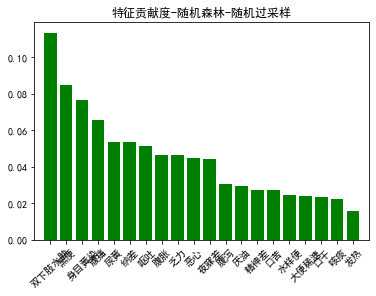

In [36]:
#将特征重要度以柱状图展示

import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置字体
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure()
plt.title("特征贡献度-随机森林-随机过采样")
plt.bar(range(top_features), importances[top_indices], color="g", align="center")
plt.xticks(range(top_features), [features[i] for i in top_indices], rotation='45')
plt.xlim([-1, top_features])
plt.show()

In [33]:
#输出各个特征的重要度
for i in top_indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

双下肢水肿 - 0.113
黑便 - 0.085
身目黄染 - 0.076
腹痛 - 0.065
尿黄 - 0.054
纳差 - 0.054
呕吐 - 0.051
腹胀 - 0.047
乏力 - 0.047
恶心 - 0.044
夜寐差 - 0.044
腹泻 - 0.031
厌油 - 0.029
精神差 - 0.027
口苦 - 0.027
水样便 - 0.025
大便稀溏 - 0.024
口干 - 0.023
咳痰 - 0.022
发热 - 0.015
